In [1]:
# Start small and save your time.

In [2]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np 
import math
import random

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from ipynb.fs.full.MyFunctions_00 import *

In [3]:
voids_parent = read_data_db('voids_parent_colors_' + 'new_' + '04-11-23') # timestamp())
print(len(voids_parent))
voids_parent.tail()

read voids_parent_colors_new_04-11-23
71261


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
71256,698403.0,17.0,-0.044828,1,216.402857,1.156409,0,0,0,-19.991549,...,0.048,22.7,12.420,0.361,3.0,8.779,NaN,1.3,0.068,1.993
71257,698408.0,19.0,0.281794,1,215.893905,0.813985,0,0,0,-20.274261,...,0.040,27.0,11.449,0.156,7.0,8.577,0.280,3.9,0.320,2.562
71258,698507.0,19.0,0.031540,1,219.945702,-0.369095,0,0,0,-19.780115,...,0.048,22.7,10.912,0.108,10.0,8.933,0.438,2.5,0.129,3.449
71259,698517.0,20.0,0.810162,1,219.254525,-1.072115,0,0,0,-20.390760,...,0.033,32.7,9.553,0.053,20.5,7.022,0.128,8.5,0.937,3.061
71260,698561.0,21.0,0.913873,1,219.551942,-1.517284,919,556,52409,-21.115179,...,0.025,43.9,10.195,0.056,19.4,8.691,0.316,3.4,0.670,2.432


In [4]:
# sanmple() function does not have replacement
random_list = random.sample(range(0, 71260), 7000)
print(len(random_list))
random_list[:5]

7000


[16663, 586, 26307, 31109, 51436]

In [5]:
voids_sample = voids_parent.iloc[random_list]
print(len(voids_sample))
voids_sample.head()

7000


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
16663,182304.0,23.0,-0.008307,1,204.858147,58.623898,960,158,52425,-20.469608,...,0.031,34.9,12.564,NaN,0.5,9.153,NaN,-0.7,0.114,1.202
586,7677.0,23.0,0.988928,1,184.468494,-0.362130,287,32,52023,-20.152777,...,0.047,22.9,11.307,0.303,3.6,8.401,NaN,-1.0,0.022,2.138
26307,264382.0,23.0,-0.297006,1,251.929759,32.152116,1341,43,52786,-20.456982,...,0.033,33.1,12.576,0.395,2.7,9.264,NaN,0.3,0.126,1.251
31109,298861.0,24.0,0.648042,1,189.491007,46.827068,1453,14,53084,-21.313269,...,0.025,42.6,12.123,0.289,3.8,9.061,NaN,0.6,0.082,0.896
51436,456589.0,24.0,-0.041578,1,221.525787,29.208104,2141,197,53764,-17.281219,...,0.037,29.4,10.785,0.073,14.8,8.696,0.247,4.4,0.222,3.535


In [6]:
voids_AGN = voids_sample[(voids_sample['W1-W2'] > 0.80)]
num_AGN = len(voids_AGN)
print(num_AGN)

36


In [7]:
print(float(num_AGN) / 7000.0)

0.005142857142857143


In [8]:
# put new data into old variables:
voids_colors = voids_sample

mean_voids_12 = voids_colors['W1-W2'].mean()
std_voids_12 = np.std(voids_colors['W1-W2'])

mean_voids_23 = voids_colors['W2-W3'].mean()
std_voids_23 = np.std(voids_colors['W2-W3'])

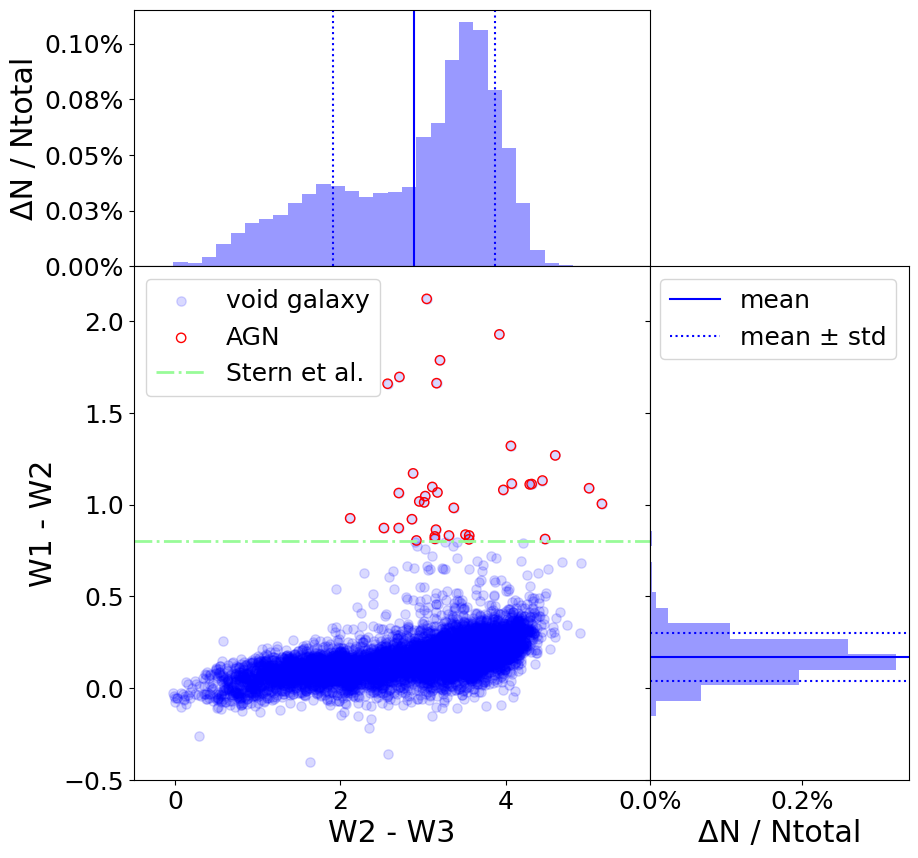

In [38]:
# plot color-color diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10), 
                        gridspec_kw = {'height_ratios': [1, 2],
                                     'width_ratios': [2, 1]} )

plt.subplots_adjust(wspace = 0, hspace = 0)

num_bins = 30

# fig.suptitle('New color–color diagram showing void and wall galaxies', fontsize = 'x-large')

# axs[0, 0].set_title('Color distribution', fontsize = 'large')

# in the bottom left subplot, make a color-color diagram by plotting each galaxy by its two colors
# wall galaxies are in gray, while void galaxies are in blue
# use a low alpha value to avoid overplotting - there are a lot of overlapping points
axs[1, 0].scatter(voids_colors['W2-W3'], 
                  voids_colors['W1-W2'], 
                  s = 45,
                  c = 'blue',
                  marker = "o", # change symbol
                  label = 'void galaxy',
                  alpha = 0.15)

axs[1, 0].scatter(voids_AGN['W2-W3'], 
                  voids_AGN['W1-W2'], 
                  s = 45,
                  facecolors='none',
                  marker = "o", # change symbol
                  label = 'AGN',
                  alpha = 1,
                  linewidths = 1,
                 edgecolors = 'red')

axs[1, 0].set_ylim([-0.5, 2.3])
axs[1, 0].set_xlim([-0.5, 5.75])

# axs[0, 0].set_ylim([0, 0.225])
# axs[1, 1].set_xlim([0, 0.375])

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
for ax in axs.flat:
    ax.label_outer()

    
# make a histogram in the top left subplot that corresponds with the color on the x-axis of the diagram
# manually increase the number of bins to more clearly see the distribution

axs[0, 0].hist(voids_colors['W2-W3'],
               color = "blue",
               linewidth = 1.2,
               weights = np.ones_like(voids_colors['W2-W3']) / len(voids_colors['W2-W3']),
               alpha = 0.4,
               bins = np.linspace(min(voids_colors['W2-W3'].min(), voids_colors['W2-W3'].min()), 
                                  max(voids_colors['W2-W3'].max(), voids_colors['W2-W3'].max()), 
                                  num = num_bins, 
                                  endpoint = False))

axs[0, 0].axvline(x = mean_voids_23, color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 - std_voids_23, linestyle = 'dotted', color = 'blue')
axs[0, 0].axvline(x = mean_voids_23 + std_voids_23, linestyle = 'dotted', color = 'blue')

axs[1, 1].hist(voids_colors['W1-W2'], 
               color = "blue", 
               weights = np.ones_like(voids_colors['W1-W2']) / len(voids_colors['W1-W2']),
               alpha = 0.4,
               orientation='horizontal',
               bins = np.linspace(min(voids_colors['W1-W2'].min(), voids_colors['W1-W2'].min()), 
                                  max(voids_colors['W1-W2'].max(), voids_colors['W1-W2'].max()), 
                                  num = num_bins,
                                  endpoint = False)
               )

axs[1, 1].axhline(y = mean_voids_12, color = 'blue', label = 'mean')
axs[1, 1].axhline(y = mean_voids_12 - std_voids_12, linestyle = 'dotted', color = 'blue', 
                  label = 'mean ± std')
axs[1, 1].axhline(y = mean_voids_12 + std_voids_12, linestyle = 'dotted', color = 'blue')

# plot the horizontal lines above which AGNs form, according to Stern et al.
axs[1, 0].axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')

# remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_xlabel('W2 - W3', fontsize = 'large')
axs[1, 0].set_ylabel('W1 - W2', fontsize = 'large')

axs[0, 0].set_ylabel('ΔN / Ntotal', fontsize = 'large')
axs[1, 1].set_xlabel('ΔN / Ntotal', fontsize = 'large')

axs[1, 0].legend(loc = 'best')
axs[1, 1].legend(loc = 'best')

plt.rcParams.update({'font.size': 18})

# sns.kdeplot(ax = axs[1, 0], data = voids_colors, x = 'W2-W3', y = 'W1-W2', thresh = 0.1, levels = 10, color = 'yellow')

# fig.savefig('Figures/AAS_new_color-color-filtered.png', dpi = 300)
plt.show()

In [26]:
voids_AGN.head(3)

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
19475,212287.0,25.0,0.732879,1,245.175706,34.583445,1057,194,52522,-20.250553,...,0.026,41.7,10.599,0.089,12.2,8.840,0.445,2.4,0.926,2.119
68316,604210.0,20.0,-0.031818,1,209.203429,26.817273,6005,873,56090,-19.536478,...,0.041,26.3,9.181,0.028,38.2,5.697,0.047,23.2,1.090,5.009
42782,400907.0,22.0,0.275036,1,117.480251,52.123301,1869,392,53327,-19.525055,...,0.035,31.4,10.539,0.073,14.9,8.929,0.441,2.5,0.864,3.157


In [29]:
voids_sample.head(3)

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
16663,182304.0,23.0,-0.008307,1,204.858147,58.623898,960,158,52425,-20.469608,...,0.031,34.9,12.564,NaN,0.5,9.153,NaN,-0.7,0.114,1.202
586,7677.0,23.0,0.988928,1,184.468494,-0.362130,287,32,52023,-20.152777,...,0.047,22.9,11.307,0.303,3.6,8.401,NaN,-1.0,0.022,2.138
26307,264382.0,23.0,-0.297006,1,251.929759,32.152116,1341,43,52786,-20.456982,...,0.033,33.1,12.576,0.395,2.7,9.264,NaN,0.3,0.126,1.251
